In [25]:
# load data\new\ZIP\NJ ZIP Data-To Share.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 24,
    'axes.titleweight': 'bold',
    'axes.labelsize': 20,
    'axes.labelweight': 'bold',
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

sns.set_context('talk')
sns.set_style('whitegrid')


def format_num(num, pos, fmt=1e6):
    """Format numbers for x-axis and y-axis."""
    if num == 0:
        return '$0'
    elif num < fmt / 100:
        return f'${num:.1f}'
    else:
        return f'${num / fmt:.1f}M'

data = pd.read_csv('data/new/ZIP/NJ ZIP Data-To Share.csv')
data.tail()

,Unnamed: 0,Product Type,Approval Date,Product ID,Amount,Total Cost of Vehicles,How many vehicles of this model purchasing?,Vehicle Make,Vehicle Model,Vehicle Model Year,What is the vehicle class?
167,168,ZIP_Phase2,2024-09-11 00:00:00,PROD-00315277,180700.0,465380.0,2.0,Green Power Motor Company,EV Star Cargo,2023.0,"Class 4: 14,001 - 16,000 lbs"
168,169,ZIP_Phase2,2024-06-20 00:00:00,PROD-00315284,92950.0,116345.0,1.0,Green Power Motor Company,EV Star Cargo,2023.0,"Class 4: 14,001 - 16,000 lbs"
169,170,ZIP_Phase2,2024-09-16 00:00:00,PROD-00315287,92950.0,116345.0,1.0,Green Power Motor Company,EV Star Cargo,2023.0,"Class 4: 14,001 - 16,000 lbs"
170,171,ZIP_Phase2,2024-07-23 00:00:00,PROD-00315288,87750.0,116345.0,1.0,Green Power Motor Company,EV Star Cargo,2023.0,"Class 4: 14,001 - 16,000 lbs"
171,172,ZIP_Phase2,2024-08-16 00:00:00,PROD-00316245,328000.0,328000.0,4.0,CENNTRO,LS400,2023.0,"Class 4: 14,001 - 16,000 lbs"


In [26]:
# drop unnamed 0
data = data.drop('Unnamed: 0', axis=1)
data.head(1)

,Product Type,Approval Date,Product ID,Amount,Total Cost of Vehicles,How many vehicles of this model purchasing?,Vehicle Make,Vehicle Model,Vehicle Model Year,What is the vehicle class?
0,ZIP_Phase1,2021-05-19 00:00:00,PROD-00258414,170000.0,298000.0,2.0,Hino,M5 (195),NaN,"Class 5: 16,001 - 19,500 lbs"


In [27]:
data.columns

Index(['Product Type', 'Approval Date', 'Product ID', 'Amount',
       'Total Cost of Vehicles', 'How many vehicles of this model purchasing?',
       'Vehicle Make', 'Vehicle Model', 'Vehicle Model Year',
       'What is the vehicle class? '],
      dtype='object')

In [28]:
# convert approval date to date time
data['Date'] = pd.to_datetime(data['Approval Date'])
data.head(1)

,Product Type,Approval Date,Product ID,Amount,Total Cost of Vehicles,How many vehicles of this model purchasing?,Vehicle Make,Vehicle Model,Vehicle Model Year,What is the vehicle class?,Date
0,ZIP_Phase1,2021-05-19 00:00:00,PROD-00258414,170000.0,298000.0,2.0,Hino,M5 (195),NaN,"Class 5: 16,001 - 19,500 lbs",2021-05-19


C:\Users\akash\AppData\Local\Temp\ipykernel_11348\225483095.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date', y='Amount', data=total_award_by_month, palette='viridis')


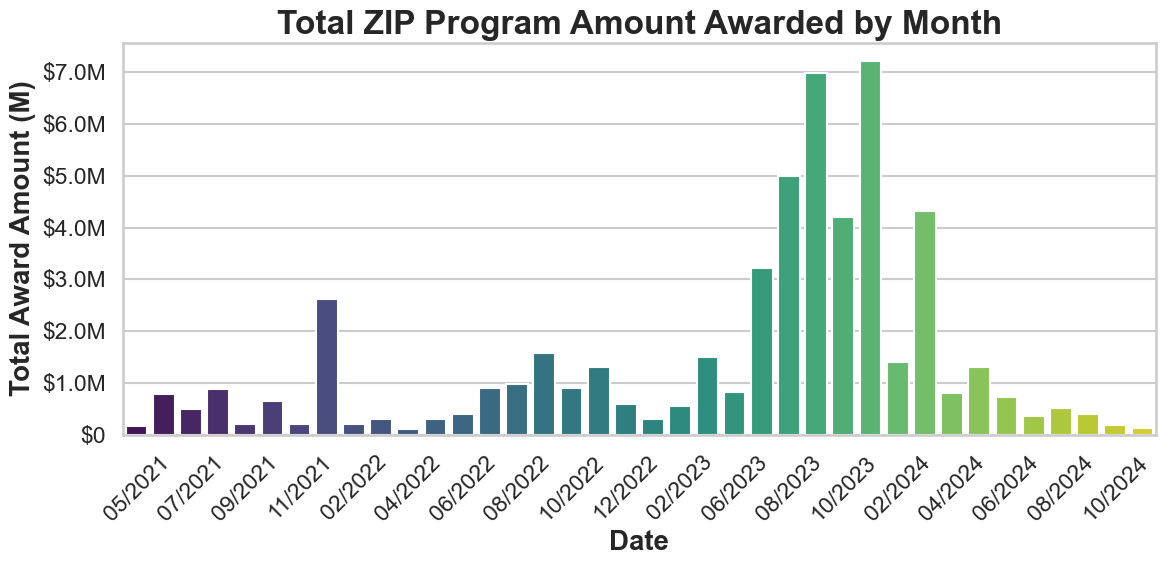

In [37]:
import matplotlib.ticker as ticker

total_award_by_month = data.groupby(data['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
total_award_by_month['Date'] = total_award_by_month['Date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Amount', data=total_award_by_month, palette='viridis')
plt.title('Total ZIP Program Amount Awarded by Month', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Award Amount (M)', fontsize=20)

# Format x-axis with every other label and "%m/%Y"
plt.xticks(rotation=45)
ticks = plt.gca().get_xticks()
tick_labels = [total_award_by_month['Date'][int(i)].strftime('%m/%Y') if i % 2 == 0 else '' for i in range(len(ticks))]
plt.xticks(ticks, tick_labels)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(format_num)

plt.tight_layout()
plt.show()

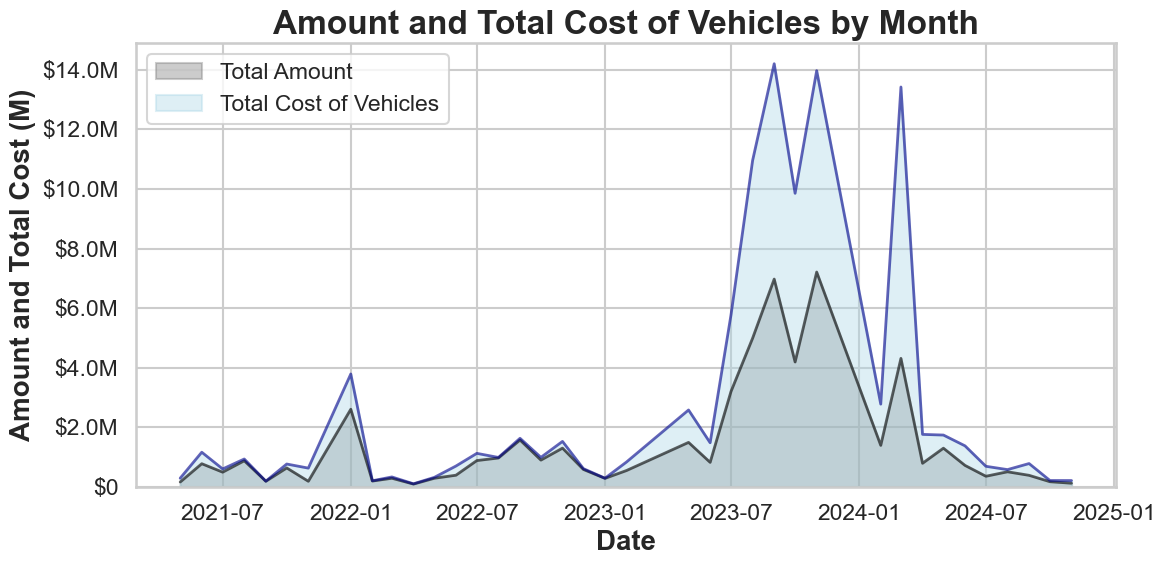

In [35]:
plt.figure(figsize=(12, 6))
plt.fill_between(total_award_by_month['Date'], total_award_by_month['Amount'], color='gray', alpha=0.4, label='Total Amount')
plt.plot(total_award_by_month['Date'], total_award_by_month['Amount'], color='black', alpha=0.6, linewidth=2)

# Adding Total Cost of Vehicles
plt.fill_between(total_award_by_month['Date'], data.groupby(data['Date'].dt.to_period('M'))['Total Cost of Vehicles'].sum().reset_index()['Total Cost of Vehicles'], color='lightblue', alpha=0.4, label='Total Cost of Vehicles')
plt.plot(total_award_by_month['Date'], data.groupby(data['Date'].dt.to_period('M'))['Total Cost of Vehicles'].sum().reset_index()['Total Cost of Vehicles'], color='darkblue', alpha=0.6, linewidth=2)

plt.title('Amount and Total Cost of Vehicles by Month', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Amount and Total Cost (M)', fontsize=20)

# Format x-axis with every other label and "%m/%Y"
plt.xticks(rotation=0)

# Format y-axis in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_num))

# Add legend
plt.legend()

plt.ylim(0)

plt.tight_layout()
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_11348\3828496660.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Amount', y='Total Cost of Vehicles', size='How many vehicles of this model purchasing?',


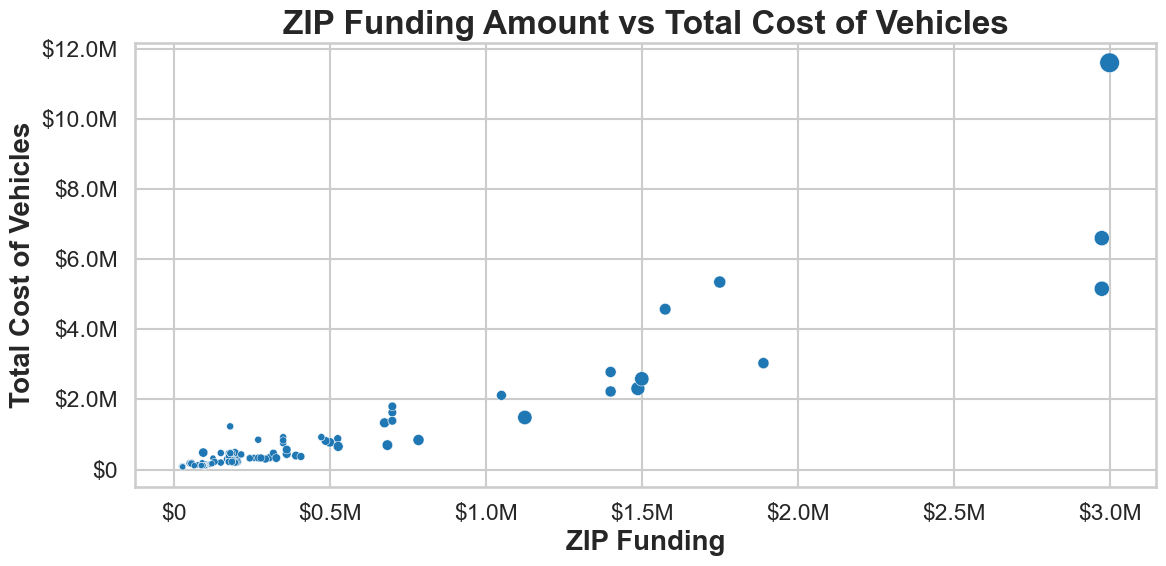

In [31]:
plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(format_num)
plt.gca().xaxis.set_major_formatter(format_num)
sns.scatterplot(x='Amount', y='Total Cost of Vehicles', size='How many vehicles of this model purchasing?', 
                 sizes=(20, 200), data=data, legend=False, palette='viridis')
plt.title('ZIP Funding Amount vs Total Cost of Vehicles', fontsize=24)
plt.xlabel('ZIP Funding', fontsize=20)
plt.ylabel('Total Cost of Vehicles', fontsize=20)
plt.tight_layout()
plt.show()


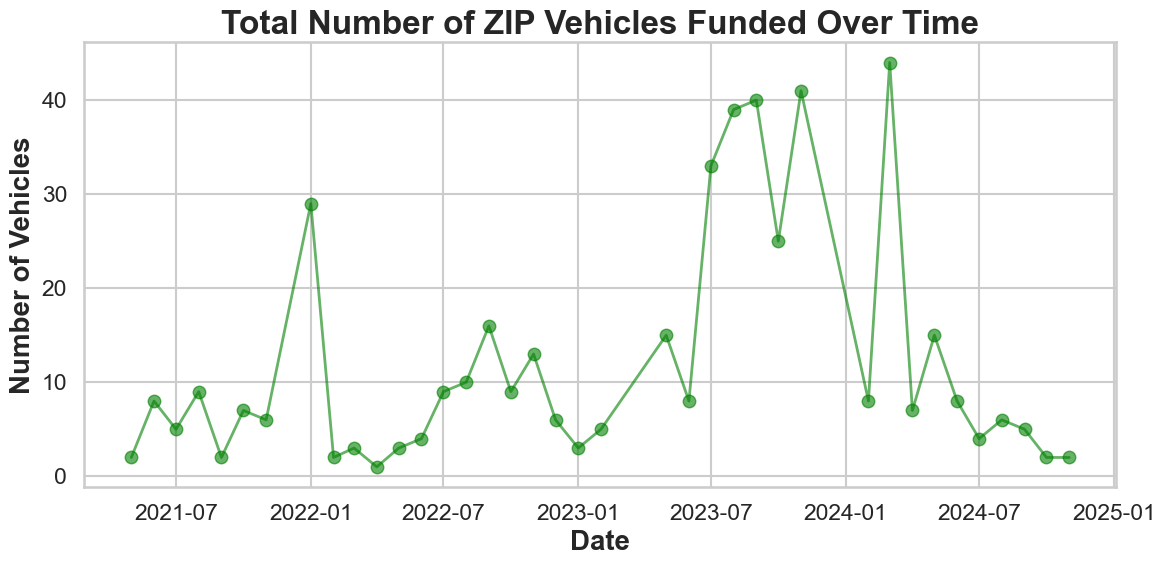

In [36]:
plt.figure(figsize=(12, 6))
monthly_vehicle_count = data.groupby(data['Date'].dt.to_period('M'))['How many vehicles of this model purchasing?'].sum().reset_index()
plt.plot(monthly_vehicle_count['Date'].dt.to_timestamp(), monthly_vehicle_count['How many vehicles of this model purchasing?'], marker='o', color='green', alpha=0.6, linewidth=2)

plt.title('Total Number of ZIP Vehicles Funded Over Time', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Vehicles', fontsize=20)

# Format x-axis with every other label and "%m/%Y"
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_11348\3903693234.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class Number', y='Number of Vehicles', data=class_vehicle_count, palette='viridis')


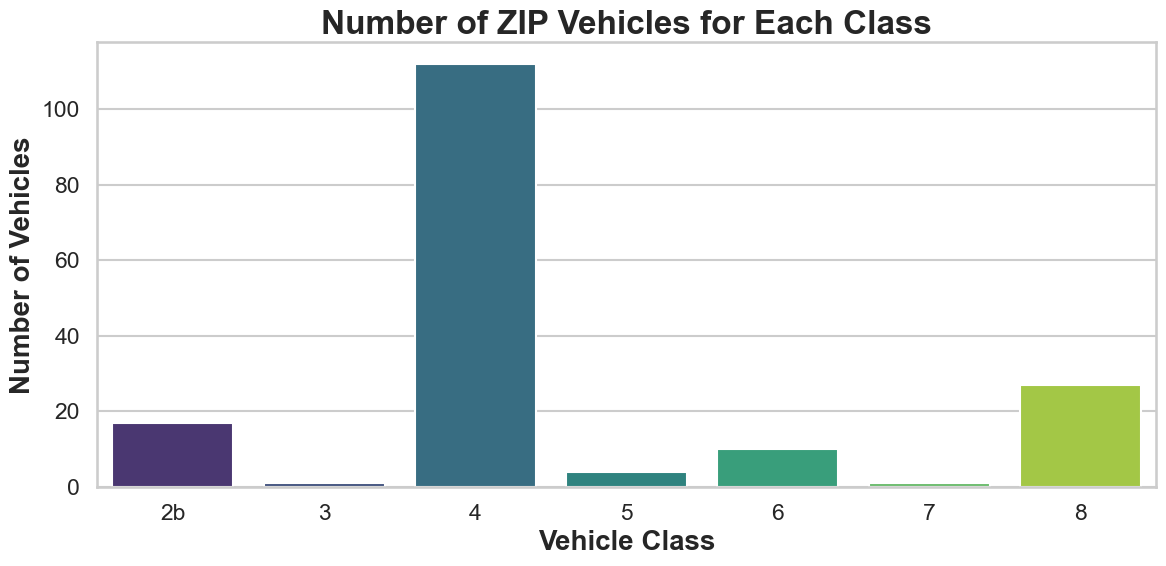

In [33]:
plt.figure(figsize=(12, 6))
class_vehicle_count = data['What is the vehicle class? '].value_counts().reset_index()
class_vehicle_count.columns = ['Vehicle Class', 'Number of Vehicles']
class_vehicle_count['Class Number'] = class_vehicle_count['Vehicle Class'].str.extract(r'Class (\d+)')
class_vehicle_count = class_vehicle_count.sort_values(by='Class Number')

# replace class number 2 with 2b
class_vehicle_count['Class Number'] = class_vehicle_count['Class Number'].replace('2', '2b')

sns.barplot(x='Class Number', y='Number of Vehicles', data=class_vehicle_count, palette='viridis')
plt.title('Number of ZIP Vehicles for Each Class', fontsize=24)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Number of Vehicles', fontsize=20)
plt.tight_layout()
plt.show()
